In [16]:
# Import libraries:
import numpy as np
import time
from A_star_Dijkstra_utilities import *
import importlib
from matplotlib import pyplot as plt
%matplotlib inline


import params

importlib.reload(params)

# Generate grid and return X and Y co-ordinates of all the nodes:
[params.X,params.Y] = generate_grid()

In [2]:
### 1.a Run the weighted A* algorithm - 

# Setup the algorithm:

numNodes = len(params.X)


# Define the start and goal nodes:
startIdx = get_node_idx(0,0)
goalIdx =  get_node_idx(48.0,2.5)
epsilon = 50  # Weighting factor for the Heuristic:

start = time.time()

# Run the A* algorithm:
aStarPathIndices = astar_no_graph(startIdx,goalIdx, numNodes, epsilon)  

end = time.time()


timeAstar = end - start

print (" Time taken for weighted A* algorithm is : " , timeAstar ,  "secs")

 Time taken for weighted A* algorithm is :  9.037723064422607 secs


 Time taken for the weighted A* algorithm is :  9.037723064422607 secs


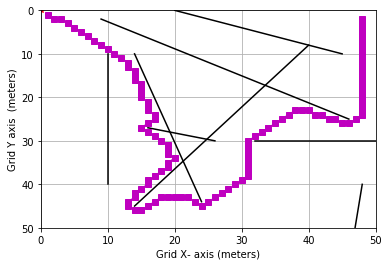

In [3]:
### 1.b Plot path generated by A* algorithm: 

# 1. The grid: 
# 2. The maze segments (Black solid lines)
# 3. The start (Red) and Goal (Green) nodes:
# 3. The shortest path (Purple line with markers)



# Start by plotting the maze segments: 
for mazeSeg in params.mazeSegments: 
    
    plt.plot([mazeSeg[0][0], mazeSeg[1][0]], [mazeSeg[0][1] , mazeSeg[1][1]],'-k')
    

# Plot the start and Goal nodes:
plt.plot(params.X[startIdx], params.Y[startIdx], 'r*')
plt.plot(params.X[goalIdx], params.Y[goalIdx], 'g*')

# Plot the shortest path:
plt.plot(params.X[aStarPathIndices], params.Y[aStarPathIndices], 'm--s')


# Set xLimit and yLimit: 
plt.xlim(0, params.widthX )
plt.ylim(0, params.widthY )
plt.grid()
plt.gca().invert_yaxis()

plt.xlabel('Grid X- axis (meters)')
plt.ylabel('Grid Y axis  (meters)')


print (" Time taken for the weighted A* algorithm is : " , timeAstar ,  "secs")


In [7]:
### 2.a Regular RRT planning algorithm: 

# Credits to Bijo Sebastian for providing this baseline implementation!

from RRT_utilities import *


# 1. Give the inputs to the RRT algorithm:
start = Node(0.0, 0.0) # Start
goal = Node(48.0, 2.5) # Goal

# # 2. Inflate the maze segments:
inflate_segments()

# # 3. Setup for vectorization:
# setup_vec()

# 4. Run the RRT algorithm and directly plot the path: 
startTime = time.time()
RRT_reg_path = RRT_reg(start, goal)
endTime = time.time()


# # 5. Get the true path from start to goal: 
# revPath = reverse_path(RRT_path)

timeRRT_reg = endTime - startTime

print (" Time taken for Regular RRT Planner WITHOUT vectorization is : " , timeRRT_reg ,  "secs")

 Time taken for Regular RRT Planner WITHOUT vectorization is :  0.8810398578643799 secs


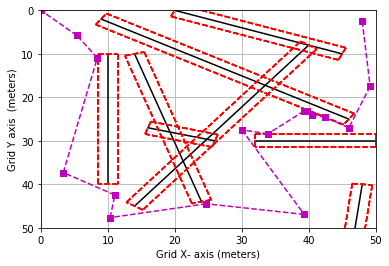

In [8]:
### 2.b Plot path generated by regular RRT algorithm: 

# -- First plot the maze segments and inflated maze segments:
for mazeSeg in params.mazeSegments: 
    
    plt.plot([mazeSeg[0][0], mazeSeg[1][0]], [mazeSeg[0][1] , mazeSeg[1][1]],'-k')

plt.xlim(0, params.widthX )
plt.ylim(0, params.widthY )
plt.grid()
plt.gca().invert_yaxis()

plt.xlabel('Grid X- axis (meters)')
plt.ylabel('Grid Y axis  (meters)')  

for mazeSeg in params.infMazeSegments: 
    
    plt.plot([mazeSeg[0][0], mazeSeg[1][0]], [mazeSeg[0][1] , mazeSeg[1][1]],'--r')
    

# -- Next plot the start and goal nodes: 
plt.plot(start.x, start.y, 'r*')
plt.plot(goal.x , goal.y , 'g*')

    
# -- Now plot the path: 
currNode = RRT_reg_path[0]

for i in range(1,len(RRT_reg_path)): 
    
    nextNode = RRT_reg_path[i]
    
    plt.plot([currNode[0] , nextNode[0]] , [currNode[1] , nextNode[1]], 'm--s')
   
    currNode = nextNode

In [12]:
### 3.a Run Vectorized RRT planning algorithm: 

# Collision checks and distance calculations have been vectorized!

# FUTURE WORK: Implement k-d tree for stroing the nodes on the Tree: 

from RRT_vect_utilities import *


# 1. Give the inputs to the RRT algorithm:
start = Node(0.0, 0.0) # Start
goal = Node(48.0, 2.5) # Goal

# 2. Inflate the maze segments:
inflate_segments()

# 3. Setup for vectorization:
setup_vec()

# 4. Run the RRT algorithm and directly plot the path: 
startTime = time.time()
RRT_path = RRT(start, goal)
endTime = time.time()


# 5. Get the true path from start to goal: 
vecRRTPath = reverse_path(RRT_path)

timeRRTVec= endTime - startTime

print (" Time taken for Vectorized RRT Planner is : " , timeRRTVec ,  "secs")


 Time taken for Vectorized RRT Planner is :  0.12078118324279785 secs


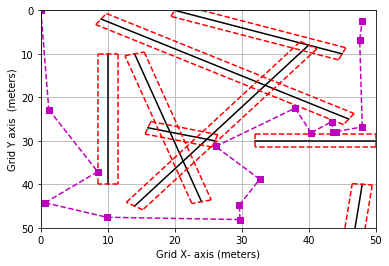

In [14]:
### 3.b Plot path generated by vectorized RRT algorithm: 

# 1. First plot the maze segments and inflated maze segments:
for mazeSeg in params.mazeSegments: 
    
    plt.plot([mazeSeg[0][0], mazeSeg[1][0]], [mazeSeg[0][1] , mazeSeg[1][1]],'-k')

plt.xlim(0, params.widthX )
plt.ylim(0, params.widthY )
plt.grid()
plt.gca().invert_yaxis()

plt.xlabel('Grid X- axis (meters)')
plt.ylabel('Grid Y axis  (meters)')  

for mazeSeg in params.infMazeSegments: 
    
    plt.plot([mazeSeg[0][0], mazeSeg[1][0]], [mazeSeg[0][1] , mazeSeg[1][1]],'--r')
    

# 2. Next plot the start and goal nodes: 
plt.plot(start.x, start.y, 'r*')
plt.plot(goal.x , goal.y , 'g*')

# # 3. Plot the tree: 
# for node in params.nodes: 
    
#     if node != start:
    
#         plt.plot([node.x, node.parent.x], [node.y, node.parent.y], 'b--o')
    
    
# 4. Now plot the path: 
currNode = vecRRTPath[0]

for i in range(1,len(vecRRTPath)): 
    
    nextNode = vecRRTPath[i]
    
    plt.plot([currNode[0] , nextNode[0]] , [currNode[1] , nextNode[1]], 'm--s')
   
    currNode = nextNode
    


In [17]:
### 4.a Run RRT* with the Vectorized collision checking: 

from RRT_star_vect_utilities import *


# 1. Give the inputs to the RRT* algorithm:
start = Node(0.0, 0.0) # Start
goal = Node(48.0, 4.5) # Goal

# 2. Inflate the maze segments:
inflate_segments()

# 3. Setup for vectorization:
setup_vec()

# 4. Run the RRT* algorithm:
startTime = time.time()
RRT_star_path = RRT_star(start, goal)
endTime = time.time()


# 5. Get the true path from start to goal: 
vecRRTStarPath = reverse_path(RRT_star_path)

timeRRTStarVec = endTime - startTime

print (" Time taken for RRT* Planner with Vecotrized Collision check is : " , timeRRTStarVec ,  "secs")



 Time taken for RRT* Planner with Vecotrized Collision check is :  0.13250327110290527 secs


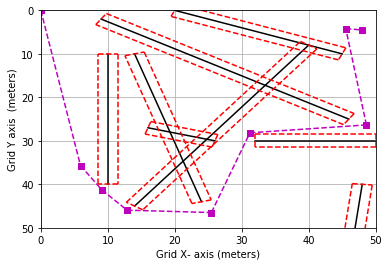

In [18]:
### 4.b Plot path generated by RRT* algorithm: 

# 1. First plot the maze segments and inflated maze segments:
for mazeSeg in params.mazeSegments: 
    
    plt.plot([mazeSeg[0][0], mazeSeg[1][0]], [mazeSeg[0][1] , mazeSeg[1][1]],'-k')

plt.xlim(0, params.widthX )
plt.ylim(0, params.widthY )
plt.grid()
plt.gca().invert_yaxis()

plt.xlabel('Grid X- axis (meters)')
plt.ylabel('Grid Y axis  (meters)')  

for mazeSeg in params.infMazeSegments: 
    
    plt.plot([mazeSeg[0][0], mazeSeg[1][0]], [mazeSeg[0][1] , mazeSeg[1][1]],'--r')
    

# 2. Next plot the start and goal nodes: 
plt.plot(start.x, start.y, 'r*')
plt.plot(goal.x , goal.y , 'g*')

plotNow = False

# # 3. Plot the tree: 
# for node in params.nodes[1:60]: 
    
#     if node != start and plotNow:
    
#         plt.plot([node.x, node.parent.x], [node.y, node.parent.y], 'b--o')
        
#         plotNow = False
    
#     plotNow = True
        
# 4. Now plot the path: 
currNode = vecRRTStarPath[0]

for i in range(1,len(vecRRTStarPath)): 
    
    nextNode = vecRRTStarPath[i]
    
    plt.plot([currNode[0] , nextNode[0]] , [currNode[1] , nextNode[1]], 'm--s')
   
    currNode = nextNode
    
    